In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8

sb.set_style('whitegrid')

In [3]:
file20 = pd.read_csv('D:\Python\eclipse-metrics-files-2.0.csv', sep=';')
file21 = pd.read_csv('D:\Python\eclipse-metrics-files-2.1.csv', sep=';')
file30 = pd.read_csv('D:\Python\eclipse-metrics-files-3.0.csv', sep=';')
package20 = pd.read_csv('D:\Python\eclipse-metrics-packages-2.0.csv', sep=';')
package21 = pd.read_csv('D:\Python\eclipse-metrics-packages-2.1.csv', sep=';')
package30 = pd.read_csv('D:\Python\eclipse-metrics-packages-3.0.csv', sep=';')

In [4]:
len_file20 = len(file20)
len_file21 = len(file21)
len_file30 = len(file30)
len_package20 = len(package20)
len_package21 = len(package21)
len_package30 = len(package30)

data = [[len_file20, len_package20], [len_file21, len_package21], [len_file30, len_package30]]
columns =  [ 'Files', 'Packages']
index = ['2.0', '2.1', '3.0']
df = pd.DataFrame(data, columns=columns, index=index)
print(df)

     Files  Packages
2.0   6729       377
2.1   7888       434
3.0  10593       661


Text(0, 0.5, 'Percentage')

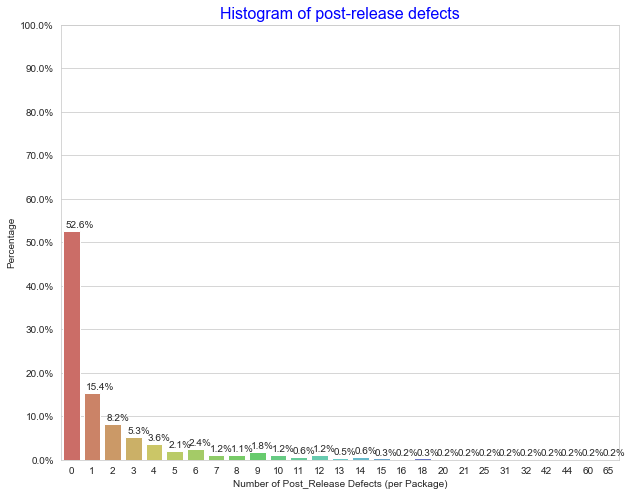

In [5]:
def histogram_of_post(data):
    total = len(data)
    ax = sb.countplot(x='post',data=data, palette='hls')
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))

    #adjust the ticklabel to the desired format, without changing the position of the ticks. 
    _ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    return ax;
ax = histogram_of_post(package30)
plt.title('Histogram of post-release defects',color = 'blue',fontsize=16)
plt.xlabel('Number of Post_Release Defects (per Package)')
plt.ylabel('Percentage')

In [16]:
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
print ('Spearman correlation between preand post-release defects and metrics')
print ("+ {:<11} + {:<10} + {:<10} +".format("----------", "----------", "----------"))
print ("| {:<11} | {:<10} | {:<10} |".format("File 3.0", "pre", "post"))
print ("+ {:<11} + {:<10} + {:<10} +".format("----------", "----------", "----------"))
for i in range (2, 35):
    t = file30.columns[i]
    s_pred = round(spearmanr(file30[t], file30['pre'])[0], 3)
    s_post = round(spearmanr(file30[t], file30['post'])[0], 3)
    r = ("| {:<11} | {:<10} | {:<10} |".format(t, s_pred, s_post))
    print (r)
print ("+ {:<11} + {:<10} + {:<10} +".format("----------", "----------", "----------"))

Spearman correlation between preand post-release defects and metrics
+ ----------  + ---------- + ---------- +
| File 3.0    | pre        | post       |
+ ----------  + ---------- + ---------- +
| pre         | 1.0        | 0.39       |
| post        | 0.39       | 1.0        |
| ACD         | 0.258      | 0.18       |
| FOUT_avg    | 0.313      | 0.242      |
| FOUT_max    | 0.375      | 0.291      |
| FOUT_sum    | 0.4        | 0.319      |
| MLOC_avg    | 0.314      | 0.243      |
| MLOC_max    | 0.38       | 0.293      |
| MLOC_sum    | 0.403      | 0.322      |
| NBD_avg     | 0.303      | 0.237      |
| NBD_max     | 0.368      | 0.29       |
| NBD_sum     | 0.392      | 0.32       |
| NOF_avg     | 0.242      | 0.191      |
| NOF_max     | 0.256      | 0.201      |
| NOF_sum     | 0.26       | 0.204      |
| NOI         | -0.16      | -0.129     |
| NOM_avg     | 0.296      | 0.255      |
| NOM_max     | 0.314      | 0.266      |
| NOM_sum     | 0.319      | 0.268      |
| NOT  

In [17]:
#print 'Spearman correlation between preand post-release defects and metrics'
#print '+ {:<11} + {:<10} + {:<10} +'.format('----------', '----------', '----------')
#print '| {:<11} | {:<10} | {:<10} |'.format('Package 3.0', 'pre', 'post')
#print '+ {:<11} + {:<10} + {:<10} +'.format('----------', '----------', '----------')
#for i in range (2, 44):
 #   t = package30.columns[i]
  #  s_pred = round(spearmanr(package30[t], package30['pre'])[0], 3)
   # s_post = round(spearmanr(package30[t], package30['post'])[0], 3)
    #r = '| {:<11} | {:<10} | {:<10} |'.format(t, s_pred, s_post)
    #print r
#print '+ {:<11} + {:<10} + {:<10} +'.format('----------', '----------', '----------')

In [18]:
from sklearn.linear_model import LinearRegression
def ranking_file(train, test):
    X = train[['pre', 'ACD','FOUT_avg', 'FOUT_max', 'FOUT_sum', 'MLOC_avg', 'MLOC_max', 'MLOC_sum', 'NBD_avg', 'NBD_max', 'NBD_sum', 'NOF_avg', 'NOF_max', 'NOF_sum', 'NOI', 'NOM_avg', 'NOM_max', 'NOM_sum', 'NOT', 'NSF_avg', 'NSF_max', 'NSF_sum', 'NSM_avg', 'NSM_max', 'NSM_sum', 'PAR_avg', 'PAR_max', 'PAR_sum', 'TLOC', 'VG_avg', 'VG_max', 'VG_sum']]
    Y = train['post']
    lm = LinearRegression()
    lm.fit(X, Y)
    R2 = round(lm.score(X, Y), 3)
    X_test = test[['pre', 'ACD','FOUT_avg', 'FOUT_max', 'FOUT_sum', 'MLOC_avg', 'MLOC_max', 'MLOC_sum', 'NBD_avg', 'NBD_max', 'NBD_sum', 'NOF_avg', 'NOF_max', 'NOF_sum', 'NOI', 'NOM_avg', 'NOM_max', 'NOM_sum', 'NOT', 'NSF_avg', 'NSF_max', 'NSF_sum', 'NSM_avg', 'NSM_max', 'NSM_sum', 'PAR_avg', 'PAR_max', 'PAR_sum', 'TLOC', 'VG_avg', 'VG_max', 'VG_sum']]
    Y_pred = lm.predict(X_test)
    Y_post = test['post']
    pear = round(pearsonr(Y_post, Y_pred)[0], 3)
    spear = round(spearmanr(Y_post, Y_pred)[0], 3)
    rank = [R2, pear, spear]
    return rank;


In [19]:
data_file = [file20, file21, file30]
release = ['2.0', '2.1', '3.0']
print ('Ranking files with linear regression (Pearson and Spearman correlation)')
print ('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------'))
print ('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format('Training', 'Testing', 'R2','Pearson','Spearman'))
print ('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------'))
for i in range (0, 3):
    for j in range (0, 3):
        r = ranking_file(data_file [i], data_file [j])
        print ('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format(release[i], release[j], r[0],r[1],r[2]))
print ('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------'))

Ranking files with linear regression (Pearson and Spearman correlation)
+ ---------- + ---------- + ---------- + ---------- + ---------- +
|  Training  |  Testing   |     R2     |  Pearson   |  Spearman  |
+ ---------- + ---------- + ---------- + ---------- + ---------- +
|    2.0     |    2.0     |   0.324    |   0.569    |   0.398    |
|    2.0     |    2.1     |   0.324    |    0.43    |   0.286    |
|    2.0     |    3.0     |   0.324    |   0.544    |    0.34    |
|    2.1     |    2.0     |   0.239    |   0.517    |   0.377    |
|    2.1     |    2.1     |   0.239    |   0.489    |   0.311    |
|    2.1     |    3.0     |   0.239    |   0.562    |   0.359    |
|    3.0     |    2.0     |   0.374    |   0.518    |   0.383    |
|    3.0     |    2.1     |   0.374    |   0.434    |   0.305    |
|    3.0     |    3.0     |   0.374    |   0.611    |   0.362    |
+ ---------- + ---------- + ---------- + ---------- + ---------- +


In [20]:
def ranking_pkg(train, test):
    X = train[['pre', 'ACD_avg', 'ACD_max', 'ACD_sum', 'FOUT_avg', 'FOUT_max', 'FOUT_sum', 'MLOC_avg', 'MLOC_max', 'MLOC_sum', 'NBD_avg', 'NBD_max', 'NBD_sum', 'NOCU', 'NOF_avg', 'NOF_max', 'NOF_sum', 'NOI_avg', 'NOI_max', 'NOI_sum', 'NOM_avg', 'NOM_max', 'NOM_sum', 'NOT_avg', 'NOT_max', 'NOT_sum', 'NSF_avg', 'NSF_max', 'NSF_sum', 'NSM_avg', 'NSM_max', 'NSM_sum', 'PAR_avg', 'PAR_max', 'PAR_sum', 'TLOC_avg', 'TLOC_max', 'TLOC_sum', 'VG_avg', 'VG_max', 'VG_sum']]
    Y = train['post']
    lm = LinearRegression()
    lm.fit(X, Y)
    R2 = round(lm.score(X, Y), 3)
    X_test = test[['pre', 'ACD_avg', 'ACD_max', 'ACD_sum', 'FOUT_avg', 'FOUT_max', 'FOUT_sum', 'MLOC_avg', 'MLOC_max', 'MLOC_sum', 'NBD_avg', 'NBD_max', 'NBD_sum', 'NOCU', 'NOF_avg', 'NOF_max', 'NOF_sum', 'NOI_avg', 'NOI_max', 'NOI_sum', 'NOM_avg', 'NOM_max', 'NOM_sum', 'NOT_avg', 'NOT_max', 'NOT_sum', 'NSF_avg', 'NSF_max', 'NSF_sum', 'NSM_avg', 'NSM_max', 'NSM_sum', 'PAR_avg', 'PAR_max', 'PAR_sum', 'TLOC_avg', 'TLOC_max', 'TLOC_sum', 'VG_avg', 'VG_max', 'VG_sum']]
    Y_pred = lm.predict(X_test)
    Y_post = test['post']
    pear = round(pearsonr(Y_post, Y_pred)[0], 3)
    spear = round(spearmanr(Y_post, Y_pred)[0], 3)
    rank = [R2, pear, spear]
    return rank;

In [21]:
data_pkg = [package20, package21, package30]
#print 'Ranking packages with linear regression (Pearson and Spearman correlation)'
#print '+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------')
#print '| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format('Training', 'Testing', 'R2','Pearson','Spearman')
#print '+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------')
#for i in range (0, 3):
 #   for j in range (0, 3):
  #      r = ranking_pkg(data_pkg [i], data_pkg [j])
   #     print '| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format(release[i], release[j], r[0],r[1],r[2])
#print '+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------')

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def classification_file(train, test):
    formula = '(post>0) ~ pre + ACD + FOUT_avg + FOUT_max + FOUT_sum + MLOC_avg + MLOC_max + MLOC_sum + NBD_avg + NBD_max + NBD_sum + NOF_avg + NOF_max + NOF_sum + NOI + NOM_avg + NOM_max + NOM_sum + NOT + NSF_avg + NSF_max + NSF_sum + NSM_avg + NSM_max + NSM_sum + PAR_avg + PAR_max + PAR_sum + + + TLOC + VG_avg + VG_max + VG_sum'
    model = smf.glm(formula=formula, data=train, family=sm.families.Binomial())
    result = model.fit()
    predictions = result.predict(test)
    TN = 0.0
    FN = 0.0
    FP = 0.0
    TP = 0.0
    for i in range(len(test['post'])):
        if test['post'][i] > 0 and predictions[i] > 0.5 :
            FN = FN + 1
        elif test['post'][i] > 0 and (not(predictions[i] > 0.5)) :
            TP = TP + 1
        elif (not(test['post'][i] > 0)) and predictions[i] > 0.5 :
            TN = TN + 1
        else :
            FP = FP + 1
    if (TP + FP == 0):
        precision = round(1, 3)
    else:
        precision = round((TP / (TP + FP)), 3)
    recall = round((TP / (TP + FN)), 3)
    accuracy = round(((TP + TN) / (TN + FN + FP + TP)), 3)
    f = round(((2*recall*precision)/(recall+precision)), 3)
    classification = [f ,precision ,recall ,accuracy]
    return classification;


In [28]:
Pf1 = []
Rf1 = []
Accf1 = []
Ff1 = []
print('Classification of files.(Precision P, Recall R, and Accuracy Acc)')
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))
print('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format('Training', 'Testing', 'P','R', 'Acc', 'F'))
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))
for i in range (0, 3):
    for j in range (0, 3):
        r = classification_file(data_file [i], data_file [j])
        Pf1.append(r[1])
        Rf1.append(r[2])
        Accf1.append(r[3])
        Ff1.append(r[0])
        print('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format(release[i], release[j], r[1],r[2], r[3], r[0]))
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))

Classification of files.(Precision P, Recall R, and Accuracy Acc)
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +
|  Training  |  Testing   |     P      |     R      |    Acc     |     F      |
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +
|    2.0     |    2.0     |   0.692    |   0.265    |   0.876    |   0.383    |
|    2.0     |    2.1     |   0.478    |   0.191    |    0.89    |   0.273    |
|    2.0     |    3.0     |   0.613    |   0.171    |   0.861    |   0.267    |
|    2.1     |    2.0     |   0.664    |   0.203    |    0.87    |   0.311    |
|    2.1     |    2.1     |   0.668    |    0.16    |    0.9     |   0.258    |
|    2.1     |    3.0     |   0.717    |   0.139    |   0.864    |   0.233    |
|    3.0     |    2.0     |   0.578    |   0.277    |   0.866    |   0.375    |
|    3.0     |    2.1     |   0.528    |    0.22    |   0.894    |   0.311    |
|    3.0     |    3.0     |   0.675    |   0.224    | 

In [29]:
def classification_pkg(train, test):
    formula = '(post>0) ~ pre + ACD_avg + ACD_max + ACD_sum + FOUT_avg + FOUT_max + FOUT_sum + MLOC_avg + MLOC_max + MLOC_sum + NBD_avg + NBD_max + NBD_sum + NOCU + NOF_avg + NOF_max + NOF_sum + NOI_avg + NOI_max + NOI_sum + NOM_avg + NOM_max + NOM_sum + NOT_avg + NOT_max + NOT_sum + NSF_avg + NSF_max + NSF_sum + NSM_avg + NSM_max + NSM_sum + PAR_avg + PAR_max + PAR_sum + TLOC_avg + TLOC_max + TLOC_sum + VG_avg + VG_max + VG_sum'
    model = smf.glm(formula=formula, data=train, family=sm.families.Binomial())
    result = model.fit()
    predictions = result.predict(test)
    TN = 0.0
    FN = 0.0
    FP = 0.0
    TP = 0.0
    for i in range(len(test['post'])):
        if test['post'][i] > 0 and predictions[i] > 0.5 :
            FN = FN + 1
        elif test['post'][i] > 0 and (not(predictions[i] > 0.5)) :
            TP = TP + 1
        elif (not(test['post'][i] > 0)) and predictions[i] > 0.5 :
            TN = TN + 1
        else :
            FP = FP + 1
    if (TP + FP == 0):
        precision = round(1, 3)
    else:
        precision = round((TP / (TP + FP)), 3)
    recall = round((TP / (TP + FN)), 3)
    accuracy = round(((TP + TN) / (TN + FN + FP + TP)),3)
    f = round(((2*recall*precision)/(recall+precision)), 3)
    classification = [f ,precision ,recall ,accuracy]
    return classification;

In [31]:
Pp1 = []
Rp1 = []
Accp1 = []
Fp1 = []
print('Classification of packages.(Precision P, Recall R, and Accuracy Acc)')
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))
print('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format('Training', 'Testing', 'P','R', 'Acc', 'F'))
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))
for i in range (0, 3):
    for j in range (0, 3):
        r = classification_pkg(data_pkg [i], data_pkg [j])
        Pp1.append(r[1])
        Rp1.append(r[2])
        Accp1.append(r[3])
        Fp1.append(r[0])
        print('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format(release[i], release[j],r[1],r[2], r[3], r[0]))
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))

Classification of packages.(Precision P, Recall R, and Accuracy Acc)
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +
|  Training  |  Testing   |     P      |     R      |    Acc     |     F      |
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +
|    2.0     |    2.0     |   0.853    |   0.763    |   0.814    |   0.805    |
|    2.0     |    2.1     |   0.741    |   0.634    |   0.737    |   0.683    |
|    2.0     |    3.0     |   0.786    |   0.588    |   0.729    |   0.673    |
|    2.1     |    2.0     |   0.806    |    0.7     |   0.764    |   0.749    |
|    2.1     |    2.1     |   0.857    |   0.742    |   0.829    |   0.795    |
|    2.1     |    3.0     |   0.861    |   0.674    |   0.794    |   0.756    |
|    3.0     |    2.0     |    0.76    |   0.784    |   0.767    |   0.772    |
|    3.0     |    2.1     |   0.782    |   0.758    |   0.797    |    0.77    |
|    3.0     |    3.0     |   0.892    |   0.789   

In [32]:
from sklearn import tree
import graphviz
import pydotplus
def decision_tree_file(train, test):
    X = train[['pre', 'ACD','FOUT_avg', 'FOUT_max', 'FOUT_sum', 'MLOC_avg', 'MLOC_max', 'MLOC_sum', 'NBD_avg', 'NBD_max', 'NBD_sum', 'NOF_avg', 'NOF_max', 'NOF_sum', 'NOI', 'NOM_avg', 'NOM_max', 'NOM_sum', 'NOT', 'NSF_avg', 'NSF_max', 'NSF_sum', 'NSM_avg', 'NSM_max', 'NSM_sum', 'PAR_avg', 'PAR_max', 'PAR_sum', 'TLOC', 'VG_avg', 'VG_max', 'VG_sum']]
    Y = train['post']
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(X, Y)
    X_test = test[['pre', 'ACD','FOUT_avg', 'FOUT_max', 'FOUT_sum', 'MLOC_avg', 'MLOC_max', 'MLOC_sum', 'NBD_avg', 'NBD_max', 'NBD_sum', 'NOF_avg', 'NOF_max', 'NOF_sum', 'NOI', 'NOM_avg', 'NOM_max', 'NOM_sum', 'NOT', 'NSF_avg', 'NSF_max', 'NSF_sum', 'NSM_avg', 'NSM_max', 'NSM_sum', 'PAR_avg', 'PAR_max', 'PAR_sum', 'TLOC', 'VG_avg', 'VG_max', 'VG_sum']]
    Y_pred = clf.predict(X_test)
    Y_post = test['post']
    #feature_names = X.columns
    #dot_data = tree.export_graphviz(clf, out_file=None, max_depth = 6, feature_names=feature_names)
    #graphh = pydotplus.graph_from_dot_data(dot_data)
    #graphh.write_pdf("D:/Python/graph1.pdf")
    TN = 0.0
    FN = 0.0
    FP = 0.0
    TP = 0.0
    for i in range(len(Y_post)):
        if Y_post[i] > 0 and Y_pred[i] < 0.5 :
            FN = FN + 1
        elif Y_post[i] > 0 and (not(Y_pred[i] < 0.5)) :
            TP = TP + 1
        elif (not(Y_post[i] > 0)) and Y_pred[i] < 0.5 :
            TN = TN + 1
        else :
            FP = FP + 1
    if (TP + FP == 0):
        precision = round(1, 3)
    else:
        precision = round((TP / (TP + FP)), 3)
    recall = round((TP / (TP + FN)), 3)
    accuracy = round(((TP + TN) / (TN + FN + FP + TP)),3)
    f = round(((2*recall*precision)/(recall+precision)), 3)
    classification = [f ,precision ,recall ,accuracy]
    return classification;

In [33]:
def decision_tree_files(files):
    X = files[['pre', 'ACD','FOUT_avg', 'FOUT_max', 'FOUT_sum', 'MLOC_avg', 'MLOC_max', 'MLOC_sum', 'NBD_avg', 'NBD_max', 'NBD_sum', 'NOF_avg', 'NOF_max', 'NOF_sum', 'NOI', 'NOM_avg', 'NOM_max', 'NOM_sum', 'NOT', 'NSF_avg', 'NSF_max', 'NSF_sum', 'NSM_avg', 'NSM_max', 'NSM_sum', 'PAR_avg', 'PAR_max', 'PAR_sum', 'TLOC', 'VG_avg', 'VG_max', 'VG_sum']]
    Y = files['post']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    X_test.index = range(len(X_test.index))
    Y_test.index = range(len(Y_test.index))
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    Y_post = Y_test
    #feature_names = X.columns
    #dot_data = tree.export_graphviz(clf, out_file=None, max_depth = 6, feature_names=feature_names)
    #graphh = pydotplus.graph_from_dot_data(dot_data)
    #graphh.write_pdf("D:/Python/graph1.pdf")
    TN = 0.0
    FN = 0.0
    FP = 0.0
    TP = 0.0
    for i in range(len(Y_post)):
        if Y_post[i] > 0 and Y_pred[i] < 0.5 :
            FN = FN + 1
        elif Y_post[i] > 0 and (not(Y_pred[i] < 0.5)) :
            TP = TP + 1
        elif (not(Y_post[i] > 0)) and Y_pred[i] < 0.5 :
            TN = TN + 1
        else :
            FP = FP + 1
    if (TP + FP == 0):
        precision = round(1, 3)
    else:
        precision = round((TP / (TP + FP)), 3)
    recall = round((TP / (TP + FN)), 3)
    accuracy = round(((TP + TN) / (TN + FN + FP + TP)),3)
    f = round(((2*recall*precision)/(recall+precision)), 3)
    classification = [f ,precision ,recall ,accuracy]
    return classification;

In [34]:
Pf2 = []
Rf2 = []
Accf2 = []
Ff2 = []
print('Classification of files.(Precision P, Recall R, and Accuracy Acc)')
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))
print('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format('Training', 'Testing', 'P','R', 'Acc', 'F'))
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))
for i in range (0, 3):
    for j in range (0, 3):
        if i == j:
            r = decision_tree_files(data_file [i])
        else:
            r = decision_tree_file(data_file [i], data_file [j])
        Ff2.append(r[0])
        Pf2.append(r[1])
        Rf2.append(r[2])
        Accf2.append(r[3])
        print('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format(release[i], release[j],r[1],r[2], r[3], r[0]))
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))

Classification of files.(Precision P, Recall R, and Accuracy Acc)
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +
|  Training  |  Testing   |     P      |     R      |    Acc     |     F      |
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +
|    2.0     |    2.0     |   0.407    |   0.482    |   0.818    |   0.441    |
|    2.0     |    2.1     |   0.256    |    0.31    |   0.828    |    0.28    |
|    2.0     |    3.0     |   0.318    |   0.304    |    0.8     |   0.311    |
|    2.1     |    2.0     |   0.345    |   0.313    |   0.814    |   0.328    |
|    2.1     |    2.1     |   0.263    |    0.27    |   0.837    |   0.266    |
|    2.1     |    3.0     |   0.338    |   0.274    |   0.813    |   0.303    |
|    3.0     |    2.0     |   0.312    |    0.39    |   0.787    |   0.347    |
|    3.0     |    2.1     |   0.244    |    0.33    |   0.817    |   0.281    |
|    3.0     |    3.0     |   0.352    |   0.383    | 

In [35]:
def decision_tree_pkg(train, test):
    X = train[['pre', 'ACD_avg', 'ACD_max', 'ACD_sum', 'FOUT_avg', 'FOUT_max', 'FOUT_sum', 'MLOC_avg', 'MLOC_max', 'MLOC_sum', 'NBD_avg', 'NBD_max', 'NBD_sum', 'NOCU', 'NOF_avg', 'NOF_max', 'NOF_sum', 'NOI_avg', 'NOI_max', 'NOI_sum', 'NOM_avg', 'NOM_max', 'NOM_sum', 'NOT_avg', 'NOT_max', 'NOT_sum', 'NSF_avg', 'NSF_max', 'NSF_sum', 'NSM_avg', 'NSM_max', 'NSM_sum', 'PAR_avg', 'PAR_max', 'PAR_sum', 'TLOC_avg', 'TLOC_max', 'TLOC_sum', 'VG_avg', 'VG_max', 'VG_sum']]
    Y = train['post']
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(X, Y)
    X_test = test[['pre', 'ACD_avg', 'ACD_max', 'ACD_sum', 'FOUT_avg', 'FOUT_max', 'FOUT_sum', 'MLOC_avg', 'MLOC_max', 'MLOC_sum', 'NBD_avg', 'NBD_max', 'NBD_sum', 'NOCU', 'NOF_avg', 'NOF_max', 'NOF_sum', 'NOI_avg', 'NOI_max', 'NOI_sum', 'NOM_avg', 'NOM_max', 'NOM_sum', 'NOT_avg', 'NOT_max', 'NOT_sum', 'NSF_avg', 'NSF_max', 'NSF_sum', 'NSM_avg', 'NSM_max', 'NSM_sum', 'PAR_avg', 'PAR_max', 'PAR_sum', 'TLOC_avg', 'TLOC_max', 'TLOC_sum', 'VG_avg', 'VG_max', 'VG_sum']]
    Y_pred = clf.predict(X_test)
    Y_post = test['post']
    #feature_names = X.columns
    #dot_data = tree.export_graphviz(clf, out_file=None, max_depth = 6, feature_names=feature_names)
    #graphh = pydotplus.graph_from_dot_data(dot_data)
    #graphh.write_pdf("D:/Python/graph1.pdf")
    TN = 0.0
    FN = 0.0
    FP = 0.0
    TP = 0.0
    for i in range(len(Y_post)):
        if Y_post[i] > 0 and Y_pred[i] < 0.5 :
            FN = FN + 1
        elif Y_post[i] > 0 and (not(Y_pred[i] < 0.5)) :
            TP = TP + 1
        elif (not(Y_post[i] > 0)) and Y_pred[i] < 0.5 :
            TN = TN + 1
        else :
            FP = FP + 1
    if (TP + FP == 0):
        precision = round(1, 3)
    else:
        precision = round((TP / (TP + FP)), 3)
    recall = round((TP / (TP + FN)), 3)
    accuracy = round(((TP + TN) / (TN + FN + FP + TP)),3)
    f = round(((2*recall*precision)/(recall+precision)), 3)
    classification = [f ,precision ,recall ,accuracy]
    return classification;

In [36]:
def decision_tree_pkgs(pkgs):
    X = pkgs[['pre', 'ACD_avg', 'ACD_max', 'ACD_sum', 'FOUT_avg', 'FOUT_max', 'FOUT_sum', 'MLOC_avg', 'MLOC_max', 'MLOC_sum', 'NBD_avg', 'NBD_max', 'NBD_sum', 'NOCU', 'NOF_avg', 'NOF_max', 'NOF_sum', 'NOI_avg', 'NOI_max', 'NOI_sum', 'NOM_avg', 'NOM_max', 'NOM_sum', 'NOT_avg', 'NOT_max', 'NOT_sum', 'NSF_avg', 'NSF_max', 'NSF_sum', 'NSM_avg', 'NSM_max', 'NSM_sum', 'PAR_avg', 'PAR_max', 'PAR_sum', 'TLOC_avg', 'TLOC_max', 'TLOC_sum', 'VG_avg', 'VG_max', 'VG_sum']]
    Y = pkgs['post']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    X_test.index = range(len(X_test.index))
    Y_test.index = range(len(Y_test.index))
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    Y_post = Y_test
    #feature_names = X.columns
    #dot_data = tree.export_graphviz(clf, out_file=None, max_depth = 6, feature_names=feature_names)
    #graphh = pydotplus.graph_from_dot_data(dot_data)
    #graphh.write_pdf("D:/Python/graph1.pdf")
    TN = 0.0
    FN = 0.0
    FP = 0.0
    TP = 0.0
    for i in range(len(Y_post)):
        if Y_post[i] > 0 and Y_pred[i] < 0.5 :
            FN = FN + 1
        elif Y_post[i] > 0 and (not(Y_pred[i] < 0.5)) :
            TP = TP + 1
        elif (not(Y_post[i] > 0)) and Y_pred[i] < 0.5 :
            TN = TN + 1
        else :
            FP = FP + 1
    if (TP + FP == 0):
        precision = round(1, 3)
    else:
        precision = round((TP / (TP + FP)), 3)
    recall = round((TP / (TP + FN)), 3)
    accuracy = round(((TP + TN) / (TN + FN + FP + TP)),3)
    f = round(((2*recall*precision)/(recall+precision)), 3)
    classification = [f ,precision ,recall ,accuracy]
    return classification;

In [38]:
Pp2 = []
Rp2 = []
Accp2 = []
Fp2 = []
print('Classification of packages.(Precision P, Recall R, and Accuracy Acc)')
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))
print('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format('Training', 'Testing', 'P','R', 'Acc', 'F'))
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))
for i in range (0, 3):
    for j in range (0, 3):
        if i==j:
            r = decision_tree_pkgs(data_pkg [i])
        else:
            r = decision_tree_pkg(data_pkg [i], data_pkg [j])
        Fp2.append(r[0])
        Pp2.append(r[1])
        Rp2.append(r[2])
        Accp2.append(r[3])
        print('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format(release[i], release[j],r[1],r[2], r[3], r[0]))
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))

Classification of packages.(Precision P, Recall R, and Accuracy Acc)
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +
|  Training  |  Testing   |     P      |     R      |    Acc     |     F      |
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +
|    2.0     |    2.0     |   0.545    |   0.556    |    0.57    |    0.55    |
|    2.0     |    2.1     |   0.659    |   0.696    |   0.703    |   0.677    |
|    2.0     |    3.0     |   0.686    |   0.671    |   0.699    |   0.678    |
|    2.1     |    2.0     |   0.726    |   0.668    |   0.706    |   0.696    |
|    2.1     |    2.1     |   0.552    |   0.571    |   0.618    |   0.561    |
|    2.1     |    3.0     |   0.728    |   0.674    |   0.726    |    0.7     |
|    3.0     |    2.0     |   0.632    |   0.758    |   0.655    |   0.689    |
|    3.0     |    2.1     |   0.671    |   0.768    |   0.728    |   0.716    |
|    3.0     |    3.0     |   0.837    |   0.778   

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [40]:
def random_forest_file(train, test):
    X = train[['pre', 'ACD','FOUT_avg', 'FOUT_max', 'FOUT_sum', 'MLOC_avg', 'MLOC_max', 'MLOC_sum', 'NBD_avg', 'NBD_max', 'NBD_sum', 'NOF_avg', 'NOF_max', 'NOF_sum', 'NOI', 'NOM_avg', 'NOM_max', 'NOM_sum', 'NOT', 'NSF_avg', 'NSF_max', 'NSF_sum', 'NSM_avg', 'NSM_max', 'NSM_sum', 'PAR_avg', 'PAR_max', 'PAR_sum', 'TLOC', 'VG_avg', 'VG_max', 'VG_sum']]
    Y = train['post']
    Yy = {}
    for i in range(len(train['post'])):
        if Y[i] > 0 :
            Yy[i] = 1;
        else:
            Yy[i] = 0
    dict_new = {
        'post': Yy
    }
    yy = pd.DataFrame(dict_new)
    Y = yy['post']
    regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
    regr.fit(X, Y)
    X_test = test[['pre', 'ACD','FOUT_avg', 'FOUT_max', 'FOUT_sum', 'MLOC_avg', 'MLOC_max', 'MLOC_sum', 'NBD_avg', 'NBD_max', 'NBD_sum', 'NOF_avg', 'NOF_max', 'NOF_sum', 'NOI', 'NOM_avg', 'NOM_max', 'NOM_sum', 'NOT', 'NSF_avg', 'NSF_max', 'NSF_sum', 'NSM_avg', 'NSM_max', 'NSM_sum', 'PAR_avg', 'PAR_max', 'PAR_sum', 'TLOC', 'VG_avg', 'VG_max', 'VG_sum']]
    Y_pred = regr.predict(X_test)
    Y_post = test['post']
    TN = 0.0
    FN = 0.0
    FP = 0.0
    TP = 0.0
    for i in range(len(Y_post)):
        if Y_post[i] > 0 and Y_pred[i] < 0.5 :
            FN = FN + 1
        elif Y_post[i] > 0 and (not(Y_pred[i] < 0.5)) :
            TP = TP + 1
        elif (not(Y_post[i] > 0)) and Y_pred[i] < 0.5 :
            TN = TN + 1
        else :
            FP = FP + 1
    if (TP + FP == 0):
        precision = round(1, 3)
    else:
        precision = round((TP / (TP + FP)), 3)
    recall = round((TP / (TP + FN)), 3)
    accuracy = round(((TP + TN) / (TN + FN + FP + TP)),3)
    f = round(((2*recall*precision)/(recall+precision)), 3)
    classification = [f ,precision ,recall ,accuracy]
    return classification;


In [41]:
Pf3 = []
Rf3 = []
Accf3 = []
Ff3 = []
print('Classification of files.(Precision P, Recall R, and Accuracy Acc)')
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))
print('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format('Training', 'Testing','P','R', 'Acc', 'F'))
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))
for i in range (0, 3):
    for j in range (0, 3):
        r = random_forest_file(data_file [i], data_file [j])
        Ff3.append(r[0])
        Pf3.append(r[1])
        Rf3.append(r[2])
        Accf3.append(r[3])
        print('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format(release[i], release[j],r[1],r[2], r[3], r[0]))
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))

Classification of files.(Precision P, Recall R, and Accuracy Acc)
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +
|  Training  |  Testing   |     P      |     R      |    Acc     |     F      |
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +
|    2.0     |    2.0     |   0.747    |   0.169    |   0.871    |   0.276    |
|    2.0     |    2.1     |   0.552    |    0.16    |   0.895    |   0.248    |
|    2.0     |    3.0     |   0.728    |   0.167    |   0.867    |   0.272    |
|    2.1     |    2.0     |   0.577    |   0.181    |   0.862    |   0.276    |
|    2.1     |    2.1     |   0.683    |   0.131    |   0.899    |    0.22    |
|    2.1     |    3.0     |   0.787    |   0.134    |   0.866    |   0.229    |
|    3.0     |    2.0     |   0.545    |   0.262    |   0.861    |   0.354    |
|    3.0     |    2.1     |   0.522    |   0.222    |   0.894    |   0.312    |
|    3.0     |    3.0     |   0.687    |   0.231    | 

In [42]:
def random_forest_pkg(train, test):
    X = train[['pre', 'ACD_avg', 'ACD_max', 'ACD_sum', 'FOUT_avg', 'FOUT_max', 'FOUT_sum', 'MLOC_avg', 'MLOC_max', 'MLOC_sum', 'NBD_avg', 'NBD_max', 'NBD_sum', 'NOCU', 'NOF_avg', 'NOF_max', 'NOF_sum', 'NOI_avg', 'NOI_max', 'NOI_sum', 'NOM_avg', 'NOM_max', 'NOM_sum', 'NOT_avg', 'NOT_max', 'NOT_sum', 'NSF_avg', 'NSF_max', 'NSF_sum', 'NSM_avg', 'NSM_max', 'NSM_sum', 'PAR_avg', 'PAR_max', 'PAR_sum', 'TLOC_avg', 'TLOC_max', 'TLOC_sum', 'VG_avg', 'VG_max', 'VG_sum']]
    Y = train['post']
    Yy = {}
    for i in range(len(train['post'])):
        if Y[i] > 0 :
            Yy[i] = 1;
        else:
            Yy[i] = 0
    dict_new = {
        'post': Yy
    }
    yy = pd.DataFrame(dict_new)
    Y = yy['post']
    regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
    regr.fit(X, Y)
    X_test = test[['pre', 'ACD_avg', 'ACD_max', 'ACD_sum', 'FOUT_avg', 'FOUT_max', 'FOUT_sum', 'MLOC_avg', 'MLOC_max', 'MLOC_sum', 'NBD_avg', 'NBD_max', 'NBD_sum', 'NOCU', 'NOF_avg', 'NOF_max', 'NOF_sum', 'NOI_avg', 'NOI_max', 'NOI_sum', 'NOM_avg', 'NOM_max', 'NOM_sum', 'NOT_avg', 'NOT_max', 'NOT_sum', 'NSF_avg', 'NSF_max', 'NSF_sum', 'NSM_avg', 'NSM_max', 'NSM_sum', 'PAR_avg', 'PAR_max', 'PAR_sum', 'TLOC_avg', 'TLOC_max', 'TLOC_sum', 'VG_avg', 'VG_max', 'VG_sum']]
    Y_pred = regr.predict(X_test)
    Y_post = test['post']
    TN = 0.0
    FN = 0.0
    FP = 0.0
    TP = 0.0
    for i in range(len(Y_post)):
        if Y_post[i] > 0 and Y_pred[i] < 0.5 :
            FN = FN + 1
        elif Y_post[i] > 0 and (not(Y_pred[i] < 0.5)) :
            TP = TP + 1
        elif (not(Y_post[i] > 0)) and Y_pred[i] < 0.5 :
            TN = TN + 1
        else :
            FP = FP + 1
    if (TP + FP == 0):
        precision = round(1, 3)
    else:
        precision = round((TP / (TP + FP)), 3)
    recall = round((TP / (TP + FN)), 3)
    accuracy = round(((TP + TN) / (TN + FN + FP + TP)),3)
    f = round(((2*recall*precision)/(recall+precision)), 3)
    classification = [f ,precision ,recall ,accuracy]
    return classification;

In [43]:
Pp3 = []
Rp3 = []
Accp3 = []
Fp3 = []
print('Classification of packages.(Precision P, Recall R, and Accuracy Acc)')
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))
print('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format('Training', 'Testing', 'P','R', 'Acc', 'F'))
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))
for i in range (0, 3):
    for j in range (0, 3):
        r = random_forest_pkg(data_pkg [i], data_pkg [j])
        Fp3.append(r[0])
        Pp3.append(r[1])
        Rp3.append(r[2])
        Accp3.append(r[3])
        print('| {:^10} | {:^10} | {:^10} | {:^10} | {:^10} | {:^10} |'.format(release[i], release[j],r[1],r[2], r[3], r[0]))
print('+ {:^10} + {:^10} + {:^10} + {:^10} + {:^10} + {:^10} +'.format('----------', '----------', '----------','----------','----------','----------'))

Classification of packages.(Precision P, Recall R, and Accuracy Acc)
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +
|  Training  |  Testing   |     P      |     R      |    Acc     |     F      |
+ ---------- + ---------- + ---------- + ---------- + ---------- + ---------- +
|    2.0     |    2.0     |   0.864    |   0.768    |   0.822    |   0.813    |
|    2.0     |    2.1     |   0.795    |   0.701    |   0.786    |   0.745    |
|    2.0     |    3.0     |   0.865    |   0.674    |   0.796    |   0.758    |
|    2.1     |    2.0     |   0.778    |   0.758    |   0.769    |   0.768    |
|    2.1     |    2.1     |   0.802    |   0.711    |   0.793    |   0.754    |
|    2.1     |    3.0     |   0.869    |   0.719    |   0.815    |   0.787    |
|    3.0     |    2.0     |   0.743    |   0.805    |   0.761    |   0.773    |
|    3.0     |    2.1     |   0.761    |   0.773    |    0.79    |   0.767    |
|    3.0     |    3.0     |   0.855    |   0.789   

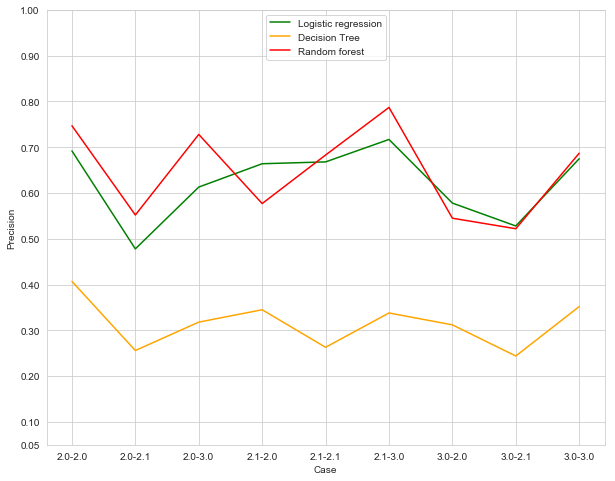

In [44]:
m = [0.05, 0.10, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
case = ['2.0-2.0', '2.0-2.1', '2.0-3.0', '2.1-2.0', '2.1-2.1', '2.1-3.0', '3.0-2.0', '3.0-2.1', '3.0-3.0']
plt.plot(case, Pf1, color='g', label='Logistic regression')
plt.plot(case, Pf2, color='orange', label='Decision Tree')
plt.plot(case, Pf3, color='red', label='Random forest')

plt.legend(loc=9)
plt.yticks(m)
plt.xlabel('Case')
plt.ylabel('Precision')
plt.show()

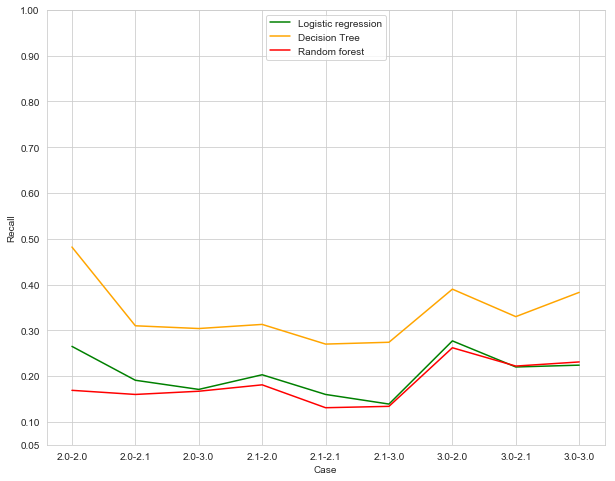

In [45]:
plt.plot(case, Rf1, color='g', label='Logistic regression')
plt.plot(case, Rf2, color='orange', label='Decision Tree')
plt.plot(case, Rf3, color='red', label='Random forest')

plt.legend(loc=9)
plt.yticks(m)
plt.xlabel('Case')
plt.ylabel('Recall')
plt.show()

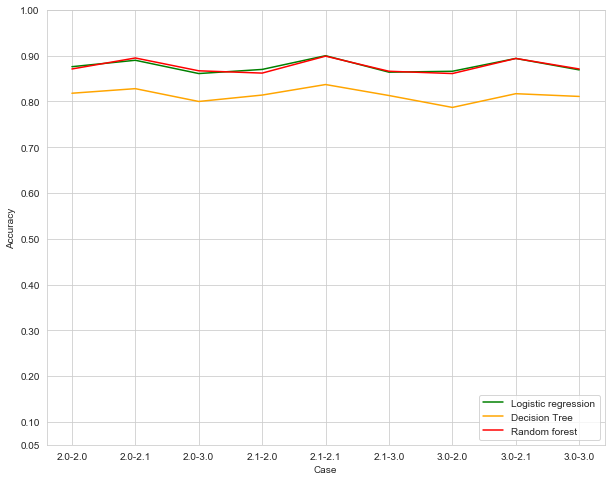

In [46]:
plt.plot(case, Accf1, color='g', label='Logistic regression')
plt.plot(case, Accf2, color='orange', label='Decision Tree')
plt.plot(case, Accf3, color='red', label='Random forest')

plt.legend(loc=4)
plt.yticks(m)
plt.xlabel('Case')
plt.ylabel('Accuracy')
plt.show()

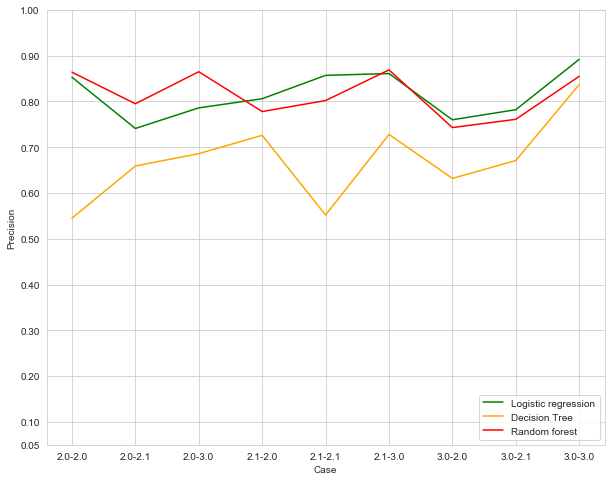

In [47]:
plt.plot(case, Pp1, color='g', label='Logistic regression')
plt.plot(case, Pp2, color='orange', label='Decision Tree')
plt.plot(case, Pp3, color='red', label='Random forest')

plt.legend(loc=4)
plt.yticks(m)
plt.xlabel('Case')
plt.ylabel('Precision')
plt.show()

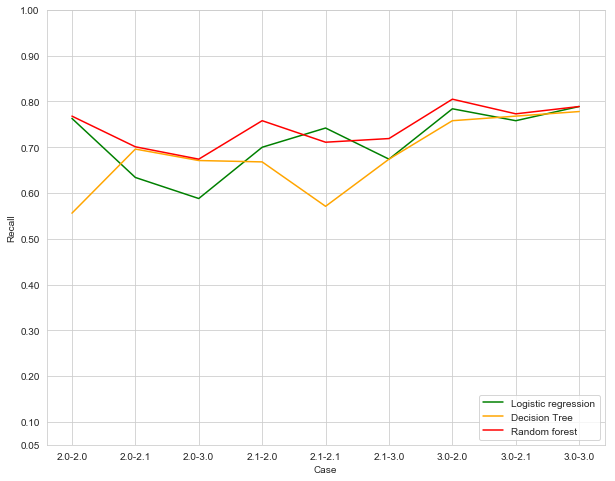

In [48]:
plt.plot(case, Rp1, color='g', label='Logistic regression')
plt.plot(case, Rp2, color='orange', label='Decision Tree')
plt.plot(case, Rp3, color='red', label='Random forest')

plt.legend(loc=4)
plt.yticks(m)
plt.xlabel('Case')
plt.ylabel('Recall')
plt.show()

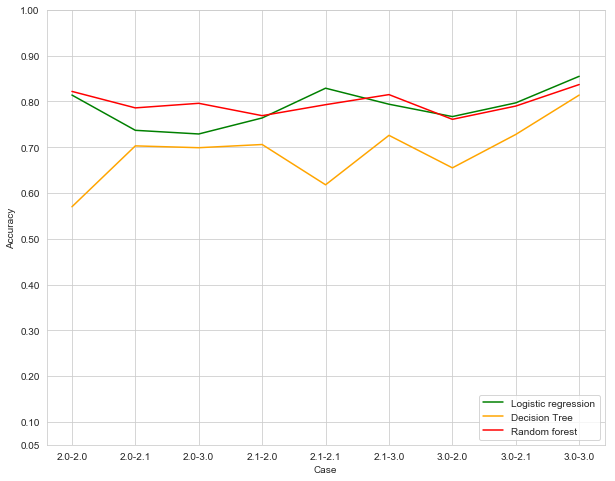

In [49]:
plt.plot(case, Accp1, color='g', label='Logistic regression')
plt.plot(case, Accp2, color='orange', label='Decision Tree')
plt.plot(case, Accp3, color='red', label='Random forest')

plt.legend(loc=4)
plt.yticks(m)
plt.xlabel('Case')
plt.ylabel('Accuracy')
plt.show()

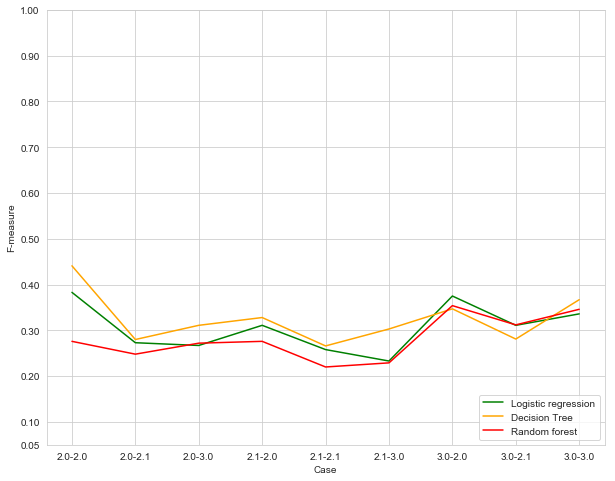

In [50]:
plt.plot(case, Ff1, color='g', label='Logistic regression')
plt.plot(case, Ff2, color='orange', label='Decision Tree')
plt.plot(case, Ff3, color='red', label='Random forest')

plt.legend(loc=4)
plt.yticks(m)
plt.xlabel('Case')
plt.ylabel('F-measure')
plt.show()

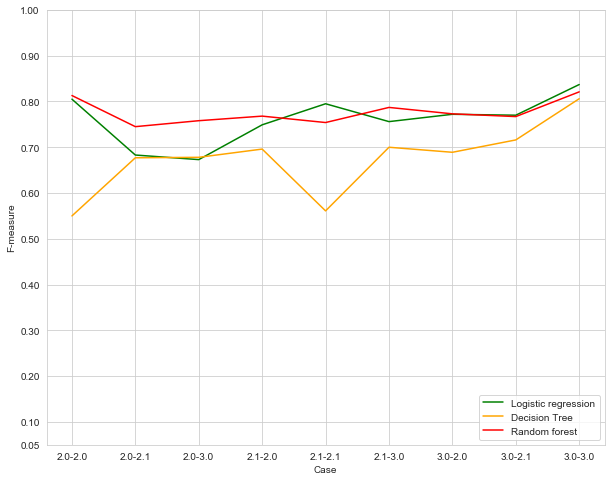

In [51]:
plt.plot(case, Fp1, color='g', label='Logistic regression')
plt.plot(case, Fp2, color='orange', label='Decision Tree')
plt.plot(case, Fp3, color='red', label='Random forest')

plt.legend(loc=4)
plt.yticks(m)
plt.xlabel('Case')
plt.ylabel('F-measure')
plt.show()